# This is an example of linear regression
## [Reference link from scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

## Importing tools

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

### Basic example of concept

1. Getting the data
2. Cleaning the data
3. Visualizing the data
4. Spliting the data into training and testing data

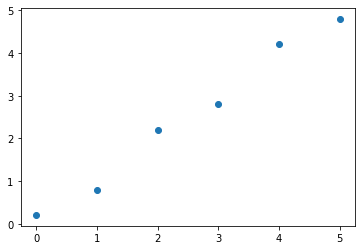

In [77]:
df = pd.DataFrame( np.array([ [0,.2],[1,0.8],[2,2.2],[3,2.8],[4,4.2],[5,4.8] ]), columns=['x', 'y']  )
# df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
#                 columns=['a', 'b', 'c'])
features = df['x']
labels = df['y']
plt.scatter(features,labels)
x = features.values.reshape(-1,1)
y = labels.values.reshape(-1,1)
'''
so here is the deal with this reshape thing
it is used to put your values in the right shape by
reshape(row, col)
so reshape(-1, 1) 
-1 for rows because we don't know how many rows there will be
1 for columns because we will only have one column
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# this splits our data into training data and testing data
# the x is our features 
# the y is our labels
# test_size is how big our test data will be
# random_state is making sure that we will always get the same random numbers

# in case you want to see anything, just uncomment it below
# print('df')
# print(df)
# print('x\n',x)
# print('y\n',y)
# print('x_train\n',x_train,'\nx_test\n', x_test)
# print( 'y_train]\n',y_train,'\ny_test\n', y_test)
# >>> reg = linear_model.LinearRegression()
# >>> reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
# LinearRegression()
# >>> reg.coef_
# array([0.5, 0.5])

### The machine learning part.
#### Here we are actually training and forming the linear regressor! (How exciting?)

In [78]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Now let's look at how our model turned out by looking at the intercept (bias) and coef (weight). 
 
 
 We'll even make a few predictions with out linear regression model.

In [114]:
print('model.intercept_:', model.intercept_)
# the intercept is where model cross the y axis
print('model.coef_:', model.coef_)
# coef is short for coefficient and is a number timesed by the feature to find the label
# so for every feature you will have a coefficient
# these coefficients are often called weights

input_for_prediction = np.array([5]).reshape(-1,1)
print('prediction input : 5 output :',model.predict(input_for_prediction))

model.intercept_: [0.08571429]
model.coef_: [[0.96571429]]
prediction input : 5 output : [[4.91428571]]


Now we'll evaluate our model by testing it and seeing what the loss is.

In [120]:
# Testing model
y_predicted = model.predict(x_test)
print('score:\t\t',model.score(x_test,y_predicted)) # score is accuracy (coefficient of determination (𝑅²))
mae = mean_absolute_error(y_test, y_predicted) # the absolute value of how much we are off on average
print('mae:\t\t', mae)
mse = mean_squared_error(y_test, y_predicted) # mae, but the difference is squared first
print('mse:\t\t', mse)
rmse = math.sqrt(mean_squared_error(y_test, y_predicted)) # mse, but the square root is taken at the end
print('rmse:\t\t', rmse)
print('r2_score:\t',r2_score(y_test, y_predicted)) # The r2_score (coefficient of determination): 1 is perfect prediction 
predicted_vs_actual = pd.DataFrame({'predicted':y_predicted.flatten(), 'actual': y_test.flatten()})
print(predicted_vs_actual)
# flatten just makes it so a matrix will turn into a 1d array.
# it does this be turning the columns into rows,
# then putting them all together in the order they where in for columns
# so it'll go col 1 with col 2 attched at the end and it keeps going

score:		 1.0
mae:		 0.14857142857142902
mse:		 0.023248979591836864
rmse:		 0.15247616073287282
r2_score:	 0.9862432073421084
   predicted  actual
0   4.914286     4.8
1   2.017143     2.2


### Let's visualize the model!
Here we'll scatter plot out our data, then we'll plot out our model on top of it to see what's happening.

VISUALIZING THE MODEL # 1


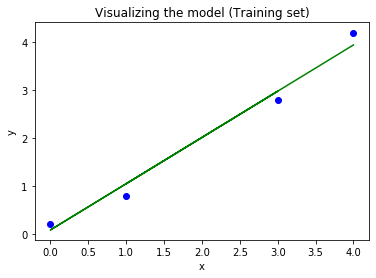

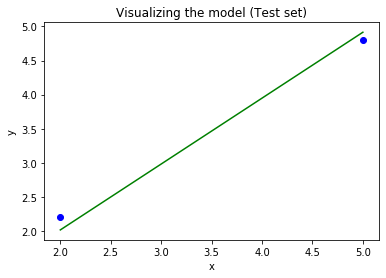

VISUALIZING THE MODEL # 2


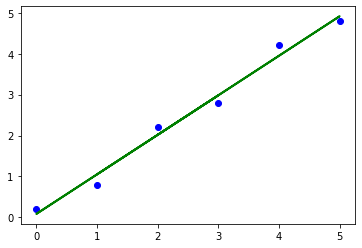

VISUALIZING THE MODEL # 3


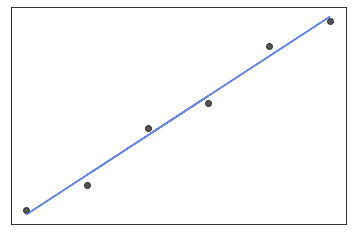

In [121]:
print('VISUALIZING THE MODEL # 1')
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, model.predict(x_train), color = "green")
plt.title('Visualizing the model (Training set)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, model.predict(x_test), color = "green")
plt.title('Visualizing the model (Test set)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('VISUALIZING THE MODEL # 2')
plt.scatter(np.concatenate((x_train,x_test)), np.concatenate((y_train,y_test)), color="blue" )
plt.plot(np.concatenate((x_train,x_test)), np.concatenate((model.predict(x_train),model.predict(x_test) )), color="green", linewidth=2 )
plt.show()

print('VISUALIZING THE MODEL # 3')
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))
predict = np.concatenate((model.predict(x_train),model.predict(x_test) ))
plt.scatter(x, y, color="#000000aa") # this means you can use rgba colors with pyplot
plt.plot(x , predict, color="#4169e1cc")
plt.xticks(())
plt.yticks(())
plt.show()

# what is r2_score? I saw it on scikit learn @ https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py 

### Multiple Linear Regression (linear regression with multiple variables) example of concept

## Real world example using cars.

### Importing datasets

In [122]:
df = pd.read_csv('datasets/Automobile_data.csv') # symboling has to do with how risky a car is from an insurance perspective

In [124]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.hist(bins=50,)